In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb


C:\Users\Diego Merello\miniconda3\envs\project3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df_train=pd.read_csv('Diamondssql.csv')
df_test=pd.read_csv('diamonds_test.csv')

In [3]:
df_train.columns

Index(['color', 'cut', 'clarity', 'price', 'city', 'depth', 'carat', 'table',
       'x', 'y', 'z'],
      dtype='object')

In [4]:
df_train

,color,cut,clarity,price,city,depth,carat,table,x,y,z
0,J,Premium,VS2,4268,Dubai,62.4,1.21,58.0,6.83,6.79,4.25
1,H,Very Good,VS2,505,Kimberly,63.0,0.32,57.0,4.35,4.38,2.75
2,G,Fair,VS1,2686,Las Vegas,65.5,0.71,55.0,5.62,5.53,3.65
3,D,Good,SI1,738,Kimberly,63.8,0.41,56.0,4.68,4.72,3.00
4,G,Ideal,SI1,4882,Dubai,60.5,1.02,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...
40450,G,Ideal,VS1,10070,Antwerp,62.7,1.34,57.0,7.10,7.04,4.43
40451,F,Good,SI2,12615,Madrid,57.1,2.02,60.0,8.31,8.25,4.73
40452,H,Ideal,SI1,5457,Kimberly,62.7,1.01,56.0,6.37,6.42,4.01
40453,J,Ideal,VS1,456,Kimberly,61.9,0.33,54.3,4.45,4.47,2.76


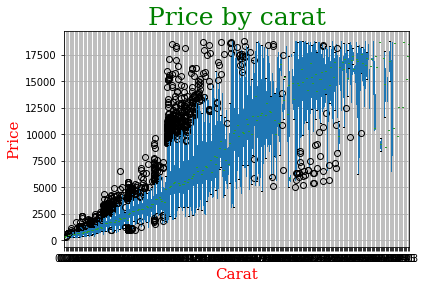

In [5]:
df_train.boxplot(column='price', by='carat')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Price',fontdict=font2)
plt.xlabel('Carat',fontdict=font2)
plt.suptitle('')
plt.title('Price by carat',fontdict=font1)
plt.show()

In [6]:
q_low = df_train["price"].quantile(0.01)
q_hi  = df_train["price"].quantile(0.99)

In [7]:
df_train = df_train[(df_train["price"] < q_hi) & (df_train["price"] > q_low)]
df_train

,color,cut,clarity,price,city,depth,carat,table,x,y,z
0,J,Premium,VS2,4268,Dubai,62.4,1.21,58.0,6.83,6.79,4.25
1,H,Very Good,VS2,505,Kimberly,63.0,0.32,57.0,4.35,4.38,2.75
2,G,Fair,VS1,2686,Las Vegas,65.5,0.71,55.0,5.62,5.53,3.65
3,D,Good,SI1,738,Kimberly,63.8,0.41,56.0,4.68,4.72,3.00
4,G,Ideal,SI1,4882,Dubai,60.5,1.02,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...
40450,G,Ideal,VS1,10070,Antwerp,62.7,1.34,57.0,7.10,7.04,4.43
40451,F,Good,SI2,12615,Madrid,57.1,2.02,60.0,8.31,8.25,4.73
40452,H,Ideal,SI1,5457,Kimberly,62.7,1.01,56.0,6.37,6.42,4.01
40453,J,Ideal,VS1,456,Kimberly,61.9,0.33,54.3,4.45,4.47,2.76


In [10]:
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [11]:
target=['price']
cat_features=['cut', 'color', 'clarity', 'city']
num_features=['carat', 'depth', 'table', 'x', 'y', 'z']

In [12]:
for cat_feat in cat_features:
    df_train[cat_feat]=df_train[cat_feat].astype('category')
    df_test[cat_feat]=df_test[cat_feat].astype('category')

In [13]:
cat_df=pd.get_dummies(df_train[cat_features])
num_df=df_train.loc[:, num_features]
train_df=pd.concat([cat_df,num_df], axis=1)

cat_df =pd.get_dummies(df_test[cat_features])
num_df=df_test.loc[:, num_features]
test_df= pd.concat([cat_df, num_df], axis=1)

features= list (cat_df.columns) + list(num_df.columns)

In [14]:
features

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'city_Amsterdam',
 'city_Antwerp',
 'city_Dubai',
 'city_Kimberly',
 'city_Las Vegas',
 'city_London',
 'city_Luxembourg',
 'city_Madrid',
 'city_New York City',
 'city_Paris',
 'city_Surat',
 'city_Tel Aviv',
 'city_Zurich',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z']

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(train_df.loc[:,features].values)
y = df_train['price']

In [16]:
X_train, X_validation, y_train, y_validation=train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestRegressor()
#model.fit(X=X_train,y=y_train)
model.fit(X,y)


RandomForestRegressor()

In [2]:
#clf = LazyClassifier(predictions=True)
#models, predictions = clf.fit(X_train, X_validation, y_train, y_validation)

NameError: name 'LazyClassifier' is not defined

In [18]:
#Se hace el scalar al Test, sólo a los valores
X_test=scaler.transform(test_df.loc[:,features].values)

In [19]:
X_test

array([[-0.17611318, -0.3155308 , -0.81809533, ...,  0.08058094,
         0.13708043,  0.19058289],
       [-0.17611318, -0.3155308 ,  1.22235144, ...,  0.96102014,
         1.00919698,  0.9222346 ],
       [-0.17611318, -0.3155308 , -0.81809533, ...,  1.46793968,
         1.3842071 ,  1.48173296],
       ...,
       [-0.17611318, -0.3155308 ,  1.22235144, ...,  0.01832766,
        -0.01990056, -0.01026267],
       [-0.17611318, -0.3155308 , -0.81809533, ...,  0.10726091,
         0.13708043, -0.12503157],
       [-0.17611318, -0.3155308 ,  1.22235144, ..., -0.9154715 ,
        -0.87457478, -0.85668328]])

In [20]:
#Realizo la predicción
#Price_predict=model.predict(X_test).clip(0,30000) #es es con el data entero
Price_predict=model.predict(X_validation).clip(0,30000)

In [21]:
rmse=mean_squared_error(y_validation, Price_predict)**0.5
rmse

206.07085949038762

In [161]:
X_test= scaler.transform(test_df.loc[:,features].values)
y_hat = model.predict(X_test).clip(0,30000) #esta es la predicción. es un array de numpy
submission = pd.DataFrame({'id': df_test['id'], 'price': y_hat}) #convertimos a dataframe y le damos forma
submission.to_csv('submission3.csv', index=False)

In [ ]:
mean_squared_error()